<a href="https://colab.research.google.com/github/maskot1977/PythonCourse2019/blob/master/Imputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Scikit-learn の impute](https://scikit-learn.org/stable/modules/impute.html) は、機械学習の前処理として欠損データを埋めるのに使われます。簡単なデータを利用して挙動を確認してみました。

# テスト用データ作成

In [58]:
data = {
    'A': [a for a in range(10)],
    'B': [a * 2 for a in range(10)],
    'C': [a * 3 for a in range(10)],
    'D': [a * 4 for a in range(10)],
        }

In [59]:
import pandas as pd

data = pd.DataFrame(data)
data

,A,B,C,D
0,0,0,0,0
1,1,2,3,4
2,2,4,6,8
3,3,6,9,12
4,4,8,12,16
5,5,10,15,20
6,6,12,18,24
7,7,14,21,28
8,8,16,24,32
9,9,18,27,36


In [60]:
import numpy as nan
data2 = pd.DataFrame(data)
#data2['B'][3] = np.nan
data2.loc.__setitem__(((2), ("B")), np.nan)
data2.loc.__setitem__(((3), ("C")), np.nan)
data2.loc.__setitem__(((5), ("C")), np.nan)
data2.loc.__setitem__(((6), ("D")), np.nan)
data2.loc.__setitem__(((7), ("D")), np.nan)
data2

,A,B,C,D
0,0,0.0,0.0,0.0
1,1,2.0,3.0,4.0
2,2,NaN,6.0,8.0
3,3,6.0,NaN,12.0
4,4,8.0,12.0,16.0
5,5,10.0,NaN,20.0
6,6,12.0,18.0,NaN
7,7,14.0,21.0,NaN
8,8,16.0,24.0,32.0
9,9,18.0,27.0,36.0


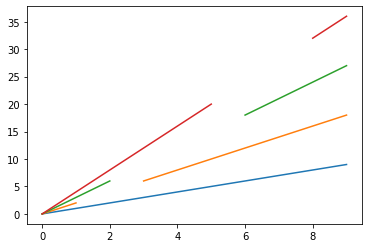

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data2)

以上のようにして、欠損値を１つ含むB列、２つ含むC列、連続した欠損値を含むD列を作成しました。

# SimpleImputer

SimpleImputerクラスは、欠損値を入力するための基本的な計算法を提供します。欠損値は、指定された定数値を用いて、あるいは欠損値が存在する各列の統計量（平均値、中央値、または最も頻繁に発生する値）を用いて計算することができます。

## default(mean)

デフォルトは平均値で埋めます。

In [66]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer() #missing_values=np.nan, strategy='mean')
data3 = pd.DataFrame(imp.fit_transform(data2))
data3

,0,1,2,3
0,0.0,0.000000,0.000,0.0
1,1.0,2.000000,3.000,4.0
2,2.0,9.555556,6.000,8.0
3,3.0,6.000000,13.875,12.0
4,4.0,8.000000,12.000,16.0
5,5.0,10.000000,13.875,20.0
6,6.0,12.000000,18.000,16.0
7,7.0,14.000000,21.000,16.0
8,8.0,16.000000,24.000,32.0
9,9.0,18.000000,27.000,36.0


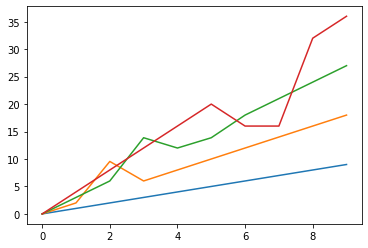

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data3)

以上のように、データの種類によっては、平均値で埋めるのは不自然になったりしますね。

## median

欠損値を中央値で埋めることもできます。

In [68]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
data4 = pd.DataFrame(imp.fit_transform(data2))
data4

,0,1,2,3
0,0.0,0.0,0.0,0.0
1,1.0,2.0,3.0,4.0
2,2.0,10.0,6.0,8.0
3,3.0,6.0,15.0,12.0
4,4.0,8.0,12.0,16.0
5,5.0,10.0,15.0,20.0
6,6.0,12.0,18.0,14.0
7,7.0,14.0,21.0,14.0
8,8.0,16.0,24.0,32.0
9,9.0,18.0,27.0,36.0


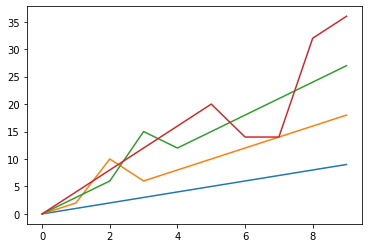

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data4)

平均値と同様、中央値で埋める場合も、データの内容によっては不自然な梅型になってしまうことがありますね。

# most_frequent

最頻値で埋めることもできます。

In [71]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data5 = pd.DataFrame(imp.fit_transform(data2))
data5

,0,1,2,3
0,0.0,0.0,0.0,0.0
1,1.0,2.0,3.0,4.0
2,2.0,0.0,6.0,8.0
3,3.0,6.0,0.0,12.0
4,4.0,8.0,12.0,16.0
5,5.0,10.0,0.0,20.0
6,6.0,12.0,18.0,0.0
7,7.0,14.0,21.0,0.0
8,8.0,16.0,24.0,32.0
9,9.0,18.0,27.0,36.0


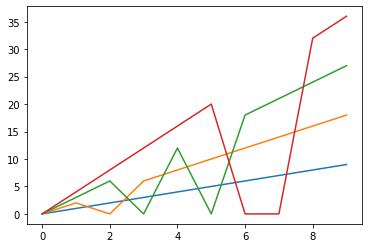

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data5)

最頻値がない場合は最初の値で埋めるようですね。

# constant

あらかじめ決まった数値を設定してそれで埋めることもできます。

In [74]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99)
data6 = pd.DataFrame(imp.fit_transform(data2))
data6

,0,1,2,3
0,0.0,0.0,0.0,0.0
1,1.0,2.0,3.0,4.0
2,2.0,99.0,6.0,8.0
3,3.0,6.0,99.0,12.0
4,4.0,8.0,12.0,16.0
5,5.0,10.0,99.0,20.0
6,6.0,12.0,18.0,99.0
7,7.0,14.0,21.0,99.0
8,8.0,16.0,24.0,32.0
9,9.0,18.0,27.0,36.0


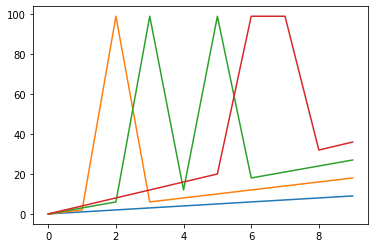

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data6)

まあ、なんて不自然なんでしょ。

# KNNImputer

KNNImputerクラスは、k-Nearest Neighborsアプローチを使用して欠損値を埋めます。デフォルトでは、欠落値をサポートするユークリッド距離メトリックであるnan_euclidean_distancesが、最近傍を見つけるために使用されます。隣人の特徴は，一様に平均化されるか，各隣人までの距離によって重み付けされます．サンプルに1つ以上の特徴が欠落している場合，そのサンプルの隣人は，入力される特定の特徴に応じて異なることがあります．利用可能な隣人の数がn_neighborsよりも少なく、訓練セットへの定義された距離がない場合、その特徴の訓練セット平均が入力中に使用されます。定義された距離を持つ隣人が少なくとも1つある場合、残りの隣人の加重平均または非加重平均が入力時に使用されます。

## n_neighbors=2

考慮に入れる隣人の数を明示的に n_neighbors=2 にしてみましょう。

In [87]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
data7 = pd.DataFrame(imputer.fit_transform(data2))
data7

,0,1,2,3
0,0.0,0.0,0.0,0.0
1,1.0,2.0,3.0,4.0
2,2.0,4.0,6.0,8.0
3,3.0,6.0,9.0,12.0
4,4.0,8.0,12.0,16.0
5,5.0,10.0,15.0,20.0
6,6.0,12.0,18.0,18.0
7,7.0,14.0,21.0,26.0
8,8.0,16.0,24.0,32.0
9,9.0,18.0,27.0,36.0


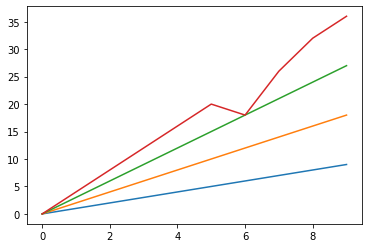

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data7)

２連続で欠損しているような場合、うまく埋められないようですね。

# default(n_neighbors=5)

デフォルトでは隣人を５人まで考慮するようです。

In [89]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
data8 = pd.DataFrame(imputer.fit_transform(data2))
data8

,0,1,2,3
0,0.0,0.0,0.0,0.0
1,1.0,2.0,3.0,4.0
2,2.0,5.2,6.0,8.0
3,3.0,6.0,12.0,12.0
4,4.0,8.0,12.0,16.0
5,5.0,10.0,16.2,20.0
6,6.0,12.0,18.0,23.2
7,7.0,14.0,21.0,23.2
8,8.0,16.0,24.0,32.0
9,9.0,18.0,27.0,36.0


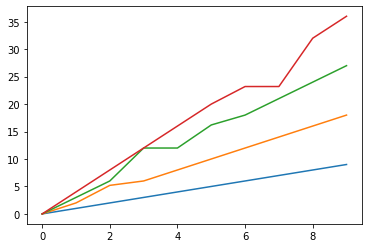

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data8)

D列の埋め方は比較的マシになりましたが、その代わりB列C列の埋め方に少し悪影響が出ましたね。

# まとめ

欠損値の埋め方に完璧な方法はたぶん存在しないので、データの特徴をよく考えながら、準最適な方法を選びましょう！